#Exercise 1

In [175]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [176]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Two gangs

Dataset:

In [177]:
[0]*10+[1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [178]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000)
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2)
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

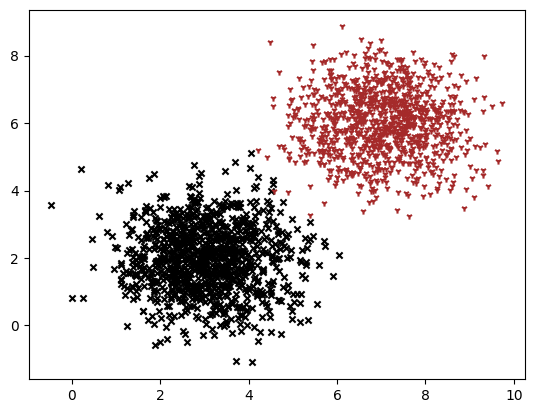

In [179]:
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='brown', marker='1', s=20)
plt.show()

In [180]:
x_label1

array([ 5.44886033,  2.01154416,  2.37305199,  2.61189516,  3.69796473,
        3.07401992,  1.45493955,  3.21914935,  3.19129801,  4.088819  ,
        3.05086493,  1.89194957,  2.48960607,  2.84026263,  1.75923449,
        3.70646244,  3.14705875,  4.69426095,  3.04730045,  1.56364466,
        3.2224388 ,  2.30405266,  2.66981689,  4.14334536,  3.54158807,
        1.49148733,  2.40064371,  4.31183953,  1.67466083,  3.91239396,
        3.53079994,  2.54675224,  3.33494521,  3.22437157,  3.24803818,
        2.25581974,  2.28815413,  2.16300637,  3.68230425,  2.14849596,
        3.12991344,  1.31629397,  4.53506447,  2.24204445,  3.79486004,
        2.57556125,  1.8791021 ,  2.50637956,  3.69248365,  3.44508949,
        3.46216787,  3.56663966,  3.53276639,  3.93943686,  4.11517452,
        5.30534529,  2.30760882,  2.51012446,  2.82784255,  3.95607534,
        3.39860926,  3.6642113 ,  4.5528205 ,  4.11119994,  4.537793  ,
        2.70573468,  3.50627693,  2.32607298,  2.98408904,  4.29

In [181]:
def loss_fn_grad(y, y_model):
 return tf.reduce_mean(-y*tf.math.log(y_model)-(1-y)*tf.math.log(1-y_model))



In [182]:
def split_dataset(data_points, label,subset_size):
    arr = np.arange(len(data_points))
    l=len(data_points)
    s=int(subset_size*l)
    np.random.shuffle(arr)
    data_points_val =data_points[arr[0:s]]
    label_val = label[arr[0:s]]
    data_points_train = data_points[arr[:int(l*(1-subset_size))]]
    label_train = label[arr[:int(l*(1-subset_size))]]

    return data_points_train,label_train,data_points_val,label_val

In [183]:
def subset_dataset(x_dataset, y_dataset,label,subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr)
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    label_train = label[arr[0:subset_size]]
    return x_train,y_train,label_train

In [184]:
def subset_dataset_concatenated(data,label,subset_size):
    arr = np.arange(len(data))
    np.random.shuffle(arr)
    data_train = data[arr[0:subset_size]]
    label_train = label[arr[0:subset_size]]
    return data_train,label_train

In [185]:
labels.shape

(2000,)

In [186]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.1
batch_size = 20

w = tf.Variable(np.random.random((2, 2)))
b = tf.Variable(np.random.random((2)))
data = np.column_stack((xs,ys))
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)

    labels_batch_one_hot = tf.one_hot(labels_batch, depth=2)
    labels_val_batch_one_hot = tf.one_hot(labels_val_batch, depth=2)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch_one_hot, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch_one_hot, pred_l_val)
    Val_loss.append(val_loss.numpy())
    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])

  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.7976343777339667, shape=(), dtype=float64) val_loss tf.Tensor(0.6645045310745415, shape=(), dtype=float64)
loss tf.Tensor(0.8669451729799297, shape=(), dtype=float64) val_loss tf.Tensor(0.7671460087352557, shape=(), dtype=float64)
loss tf.Tensor(0.7711148335587235, shape=(), dtype=float64) val_loss tf.Tensor(0.8655411328559326, shape=(), dtype=float64)
loss tf.Tensor(0.8171549808946205, shape=(), dtype=float64) val_loss tf.Tensor(0.7693248120053396, shape=(), dtype=float64)
loss tf.Tensor(0.6731736032608685, shape=(), dtype=float64) val_loss tf.Tensor(0.7157802666782599, shape=(), dtype=float64)
loss tf.Tensor(0.6970245621635479, shape=(), dtype=float64) val_loss tf.Tensor(0.7459714960377017, shape=(), dtype=float64)
loss tf.Tensor(0.7665360001095157, shape=(), dtype=float64) val_loss tf.Tensor(0.7727079331326551, shape=(), dtype=float64)
loss tf.Tensor(0.7430908114856913, shape=(), dtype=float64) val_loss tf.Tensor(0.8803401434875809, shape=(), dtype=float64)
loss tf.

In [187]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

3200 1600 800 400


In [188]:
np.max(Loss),np.min(Loss)

(0.8669451729799297, 0.5066340502394049)

In [189]:
np.max(Val_loss),np.min(Val_loss)

(0.8803401434875809, 0.5061144178887617)

In [190]:
print(w.numpy())
print(b.numpy())

[[ 0.12513583  1.02181097]
 [-0.29873544  1.00025091]]
[ 5.4495681  -3.89044614]


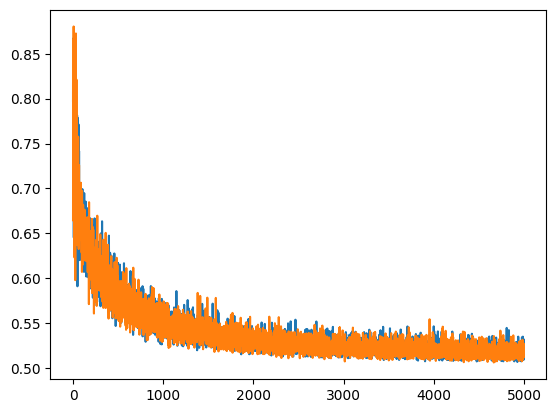

In [191]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

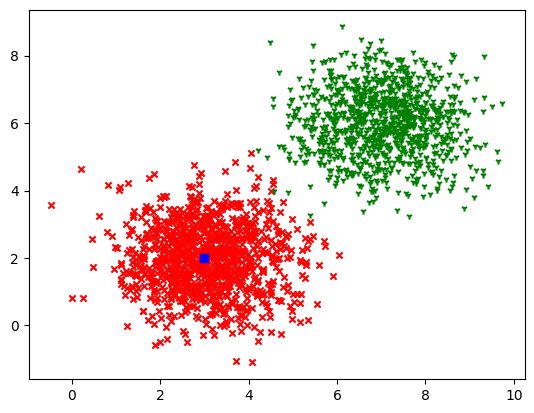

In [192]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

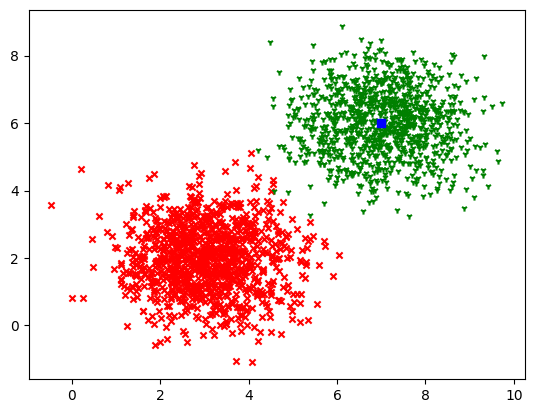

In [193]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

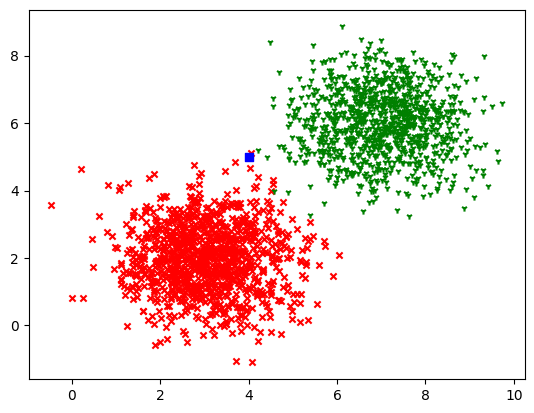

In [194]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Hiperparametria

##Learning rate 0.01

In [195]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.01
batch_size = 20

w = tf.Variable(np.random.random((2, 2)))
b = tf.Variable(np.random.random((2)))
data = np.column_stack((xs,ys))
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)

    labels_batch_one_hot = tf.one_hot(labels_batch, depth=2)
    labels_val_batch_one_hot = tf.one_hot(labels_val_batch, depth=2)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch_one_hot, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch_one_hot, pred_l_val)
    Val_loss.append(val_loss.numpy())
    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])

  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.7647334028664208, shape=(), dtype=float64) val_loss tf.Tensor(0.7997567334703317, shape=(), dtype=float64)
loss tf.Tensor(0.7799038391851141, shape=(), dtype=float64) val_loss tf.Tensor(0.7790063401554704, shape=(), dtype=float64)
loss tf.Tensor(0.8225695119132712, shape=(), dtype=float64) val_loss tf.Tensor(0.726577302590628, shape=(), dtype=float64)
loss tf.Tensor(0.8462743632631531, shape=(), dtype=float64) val_loss tf.Tensor(0.7660767899608999, shape=(), dtype=float64)
loss tf.Tensor(0.8006557097830228, shape=(), dtype=float64) val_loss tf.Tensor(0.7408518075893605, shape=(), dtype=float64)
loss tf.Tensor(0.7817934537751547, shape=(), dtype=float64) val_loss tf.Tensor(0.7814189487501543, shape=(), dtype=float64)
loss tf.Tensor(0.7467764540649778, shape=(), dtype=float64) val_loss tf.Tensor(0.8242044193522199, shape=(), dtype=float64)
loss tf.Tensor(0.820605267266395, shape=(), dtype=float64) val_loss tf.Tensor(0.7789422076577657, shape=(), dtype=float64)
loss tf.Te

In [196]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

3200 1600 800 400


In [197]:
np.max(Loss),np.min(Loss)

(0.9331220401407656, 0.556582217420378)

In [198]:
np.max(Val_loss),np.min(Val_loss)

(1.003188993512679, 0.5808985670668569)

In [199]:
print(w.numpy())
print(b.numpy())

[[1.25592541 0.31700005]
 [1.21573953 0.16564472]]
[1.05052379 0.08972305]


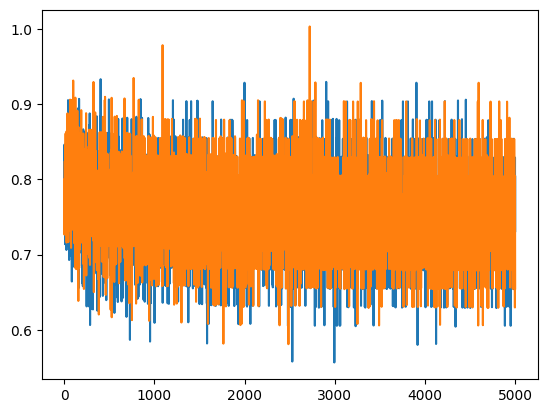

In [200]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

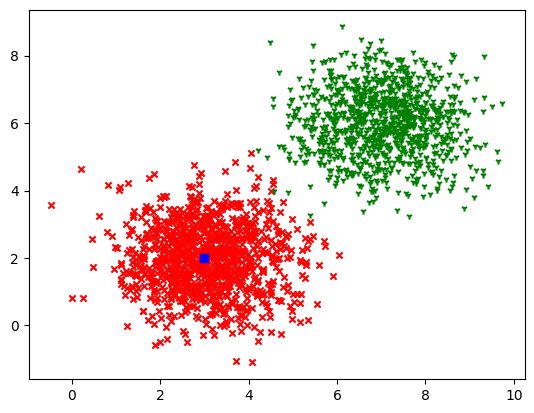

In [201]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

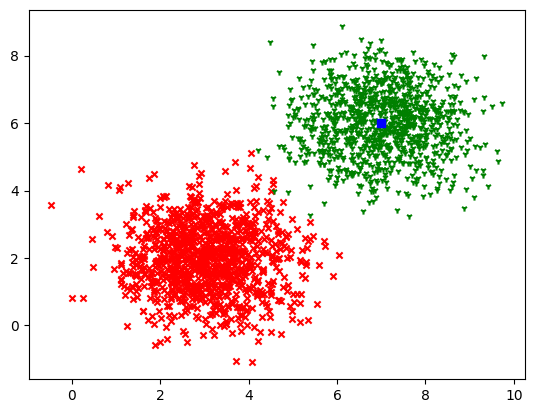

In [202]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

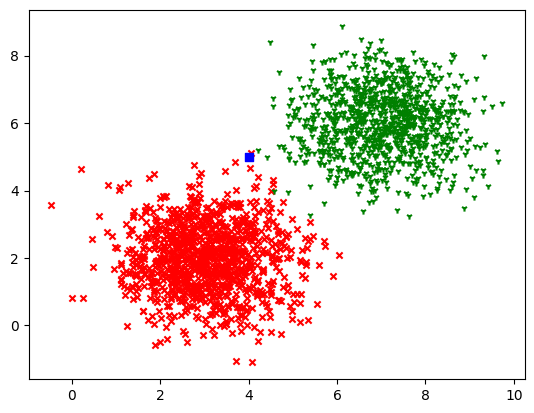

In [203]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

Learning rate 0.001

In [204]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.1
batch_size = 20

w = tf.Variable(np.random.random((2, 2)))
b = tf.Variable(np.random.random((2)))
data = np.column_stack((xs,ys))
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)

    labels_batch_one_hot = tf.one_hot(labels_batch, depth=2)
    labels_val_batch_one_hot = tf.one_hot(labels_val_batch, depth=2)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch_one_hot, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch_one_hot, pred_l_val)
    Val_loss.append(val_loss.numpy())
    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])

  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.7882050912372996, shape=(), dtype=float64) val_loss tf.Tensor(0.7308242559864719, shape=(), dtype=float64)
loss tf.Tensor(0.7615108727367061, shape=(), dtype=float64) val_loss tf.Tensor(0.7178591855551713, shape=(), dtype=float64)
loss tf.Tensor(0.7190549055167244, shape=(), dtype=float64) val_loss tf.Tensor(0.6981029545208302, shape=(), dtype=float64)
loss tf.Tensor(0.6770834400219787, shape=(), dtype=float64) val_loss tf.Tensor(0.6845232558244447, shape=(), dtype=float64)
loss tf.Tensor(0.6658951927647152, shape=(), dtype=float64) val_loss tf.Tensor(0.6562935773927753, shape=(), dtype=float64)
loss tf.Tensor(0.6616138658742695, shape=(), dtype=float64) val_loss tf.Tensor(0.6931379032466394, shape=(), dtype=float64)
loss tf.Tensor(0.6504536225837029, shape=(), dtype=float64) val_loss tf.Tensor(0.6582201163085639, shape=(), dtype=float64)
loss tf.Tensor(0.6200828487907033, shape=(), dtype=float64) val_loss tf.Tensor(0.6791369135930688, shape=(), dtype=float64)
loss tf.

In [205]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

3200 1600 800 400


In [206]:
np.max(Loss),np.min(Loss)

(0.7882050912372996, 0.5058717040309512)

In [207]:
np.max(Val_loss),np.min(Val_loss)

(0.7308242559864719, 0.5065688514518036)

In [208]:
print(w.numpy())
print(b.numpy())

[[-0.29598607  0.5959906 ]
 [-0.26613405  1.01544346]]
[ 5.14409557 -4.2707041 ]


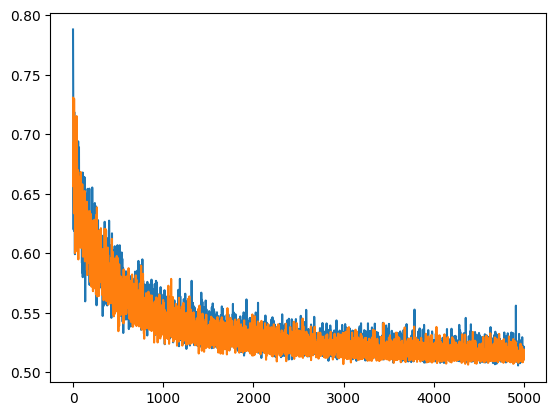

In [209]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

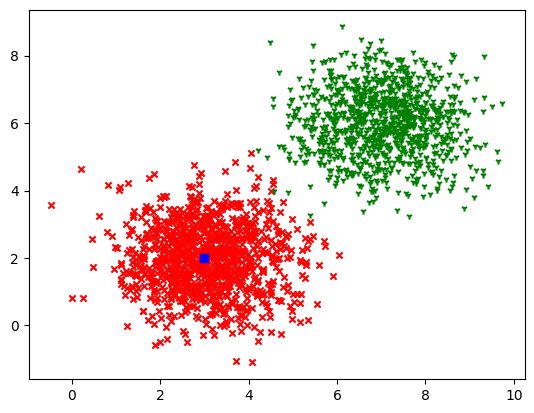

In [210]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

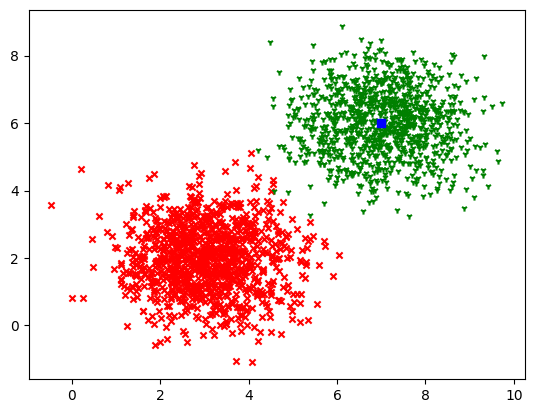

In [211]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

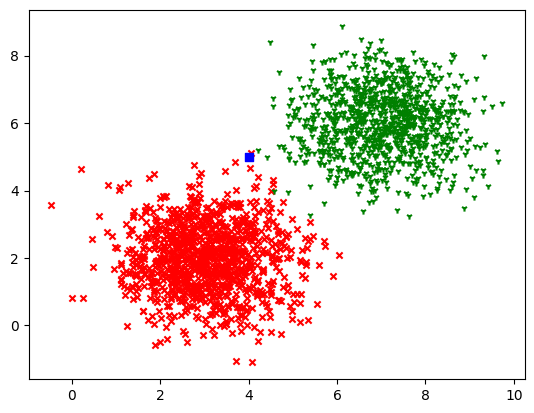

In [212]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Number of epchos - 100

In [213]:
Loss = []
Val_loss = []
epochs = 100
learning_rate = 0.1
batch_size = 20

w = tf.Variable(np.random.random((2, 2)))
b = tf.Variable(np.random.random((2)))
data = np.column_stack((xs,ys))
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)

    labels_batch_one_hot = tf.one_hot(labels_batch, depth=2)
    labels_val_batch_one_hot = tf.one_hot(labels_val_batch, depth=2)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch_one_hot, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch_one_hot, pred_l_val)
    Val_loss.append(val_loss.numpy())
    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])

  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.7459011889316628, shape=(), dtype=float64) val_loss tf.Tensor(0.7293607035765097, shape=(), dtype=float64)
loss tf.Tensor(0.7878333454760538, shape=(), dtype=float64) val_loss tf.Tensor(0.7578529044066039, shape=(), dtype=float64)
loss tf.Tensor(0.7556578066778376, shape=(), dtype=float64) val_loss tf.Tensor(0.7630992971446108, shape=(), dtype=float64)
loss tf.Tensor(0.768218264140675, shape=(), dtype=float64) val_loss tf.Tensor(0.7672930206700984, shape=(), dtype=float64)
loss tf.Tensor(0.7339274671550763, shape=(), dtype=float64) val_loss tf.Tensor(0.7377276646709809, shape=(), dtype=float64)
loss tf.Tensor(0.7219886411441676, shape=(), dtype=float64) val_loss tf.Tensor(0.7285158700450991, shape=(), dtype=float64)
loss tf.Tensor(0.7264794321457195, shape=(), dtype=float64) val_loss tf.Tensor(0.7471857546468162, shape=(), dtype=float64)
loss tf.Tensor(0.7269439113988059, shape=(), dtype=float64) val_loss tf.Tensor(0.6860746688154433, shape=(), dtype=float64)
loss tf.T

In [214]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

3200 1600 800 400


In [215]:
np.max(Loss),np.min(Loss)

(0.7878333454760538, 0.6072781613437183)

In [216]:
np.max(Val_loss),np.min(Val_loss)

(0.7969265178660555, 0.6069132964204423)

In [217]:
print(w.numpy())
print(b.numpy())

[[ 0.34865976  0.37357016]
 [-0.08901816  0.35148574]]
[0.93015622 0.49543372]


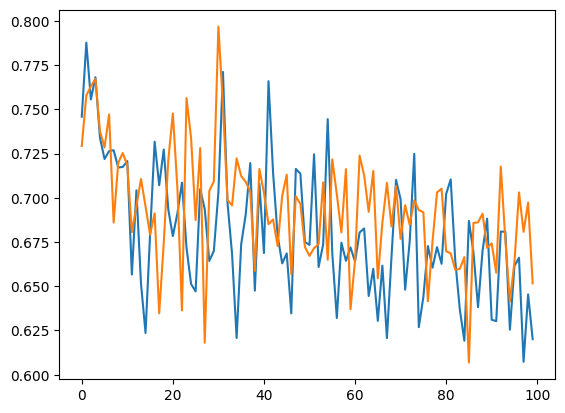

In [218]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

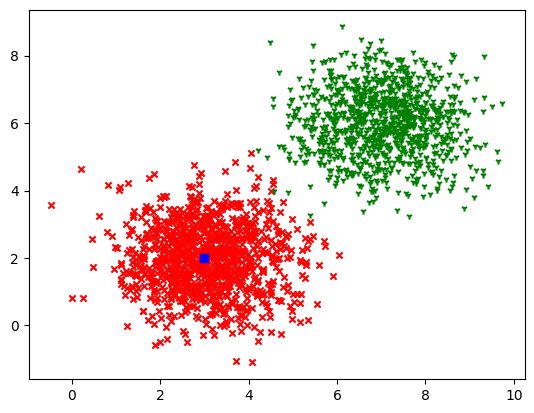

In [219]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

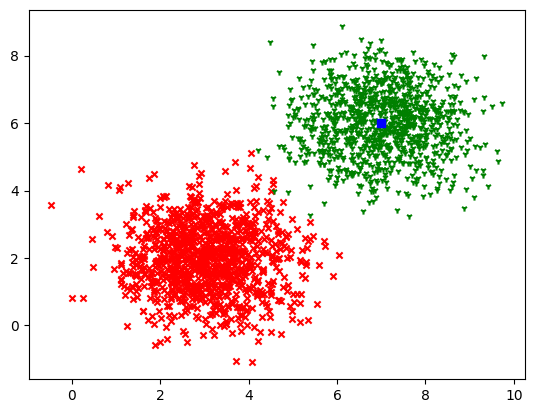

In [220]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

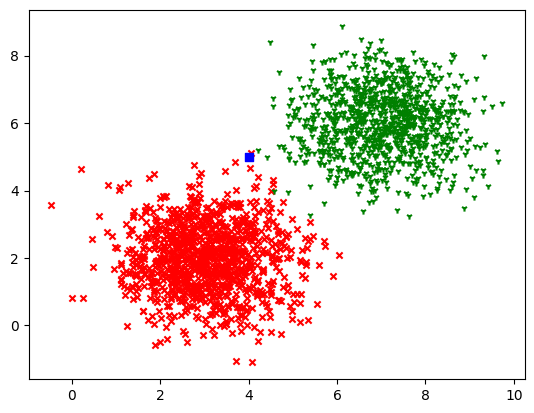

In [221]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Number of epochs - 3000

In [222]:
Loss = []
Val_loss = []
epochs = 3000
learning_rate = 0.1
batch_size = 20

w = tf.Variable(np.random.random((2, 2)))
b = tf.Variable(np.random.random((2)))
data = np.column_stack((xs,ys))
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)

    labels_batch_one_hot = tf.one_hot(labels_batch, depth=2)
    labels_val_batch_one_hot = tf.one_hot(labels_val_batch, depth=2)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch_one_hot, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch_one_hot, pred_l_val)
    Val_loss.append(val_loss.numpy())
    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])

  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.8114829060817588, shape=(), dtype=float64) val_loss tf.Tensor(0.7989381914655217, shape=(), dtype=float64)
loss tf.Tensor(0.8125032789530666, shape=(), dtype=float64) val_loss tf.Tensor(0.7602581427632809, shape=(), dtype=float64)
loss tf.Tensor(0.857484171771335, shape=(), dtype=float64) val_loss tf.Tensor(0.846672348747683, shape=(), dtype=float64)
loss tf.Tensor(0.8069950377777155, shape=(), dtype=float64) val_loss tf.Tensor(0.697648158895577, shape=(), dtype=float64)
loss tf.Tensor(0.8532158799292393, shape=(), dtype=float64) val_loss tf.Tensor(0.7769444350441012, shape=(), dtype=float64)
loss tf.Tensor(0.8616385745704864, shape=(), dtype=float64) val_loss tf.Tensor(0.7729502835659203, shape=(), dtype=float64)
loss tf.Tensor(0.7770359463661882, shape=(), dtype=float64) val_loss tf.Tensor(0.7378545937034046, shape=(), dtype=float64)
loss tf.Tensor(0.8091314311101087, shape=(), dtype=float64) val_loss tf.Tensor(0.7906290022873149, shape=(), dtype=float64)
loss tf.Ten

In [223]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

3200 1600 800 400


In [224]:
np.max(Loss),np.min(Loss)

(0.9282946837413355, 0.5296907809668986)

In [225]:
np.max(Val_loss),np.min(Val_loss)

(0.9532302407114722, 0.5782771798055311)

In [226]:
print(w.numpy())
print(b.numpy())

[[ 1.42357278 -0.3543947 ]
 [ 1.14629852 -0.13098069]]
[0.6432668  0.10318305]


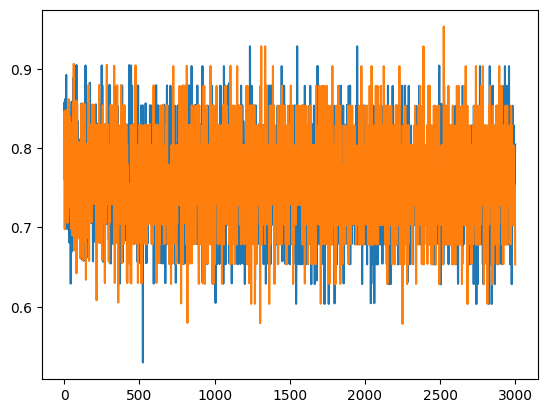

In [227]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

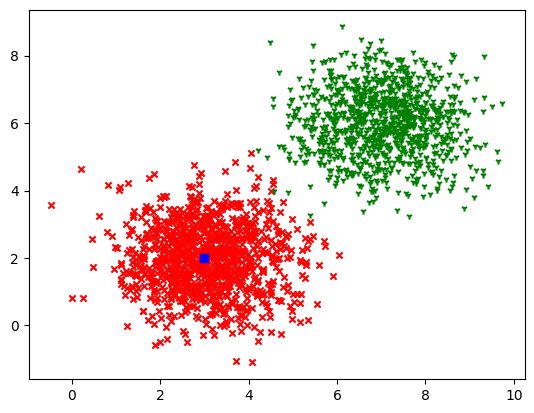

In [228]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

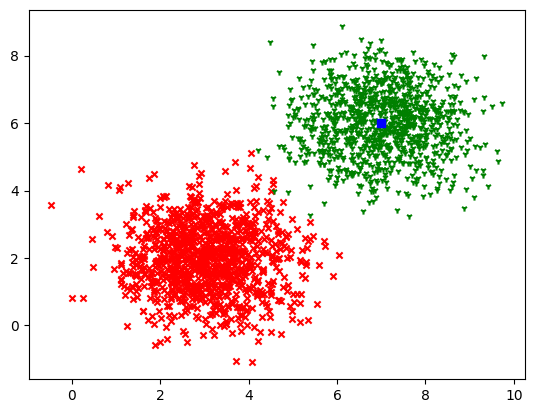

In [229]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

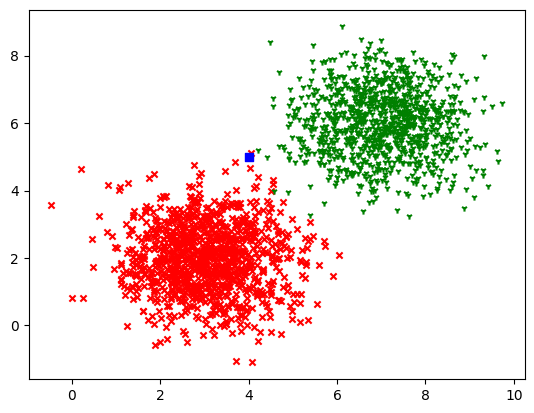

In [230]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Minibatch

#Batch size - 10

In [231]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.1
batch_size = 10

w = tf.Variable(np.random.random((2, 2)))
b = tf.Variable(np.random.random((2)))
data = np.column_stack((xs,ys))
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)

    labels_batch_one_hot = tf.one_hot(labels_batch, depth=2)
    labels_val_batch_one_hot = tf.one_hot(labels_val_batch, depth=2)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch_one_hot, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch_one_hot, pred_l_val)
    Val_loss.append(val_loss.numpy())
    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])

  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.6376840974530776, shape=(), dtype=float64) val_loss tf.Tensor(0.6754937683839404, shape=(), dtype=float64)
loss tf.Tensor(0.758356730841492, shape=(), dtype=float64) val_loss tf.Tensor(0.8200778241943407, shape=(), dtype=float64)
loss tf.Tensor(0.8011680852704842, shape=(), dtype=float64) val_loss tf.Tensor(0.6604139103968344, shape=(), dtype=float64)
loss tf.Tensor(0.7211298909769678, shape=(), dtype=float64) val_loss tf.Tensor(0.7884120599207819, shape=(), dtype=float64)
loss tf.Tensor(0.7771533704430282, shape=(), dtype=float64) val_loss tf.Tensor(0.7081799035052052, shape=(), dtype=float64)
loss tf.Tensor(0.6721374525174659, shape=(), dtype=float64) val_loss tf.Tensor(0.7064102842210754, shape=(), dtype=float64)
loss tf.Tensor(0.6830565771054065, shape=(), dtype=float64) val_loss tf.Tensor(0.6779703553273826, shape=(), dtype=float64)
loss tf.Tensor(0.7900667547767619, shape=(), dtype=float64) val_loss tf.Tensor(0.780887247683471, shape=(), dtype=float64)
loss tf.Te

In [232]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

3200 1600 800 400


In [233]:
np.max(Loss),np.min(Loss)

(0.8840225828888627, 0.505522010036187)

In [234]:
np.max(Val_loss),np.min(Val_loss)

(0.8200778241943407, 0.5052412980904848)

In [235]:
print(w.numpy())
print(b.numpy())

[[0.22663319 1.15123026]
 [0.20432411 1.49084049]]
[ 5.1085927  -4.24261619]


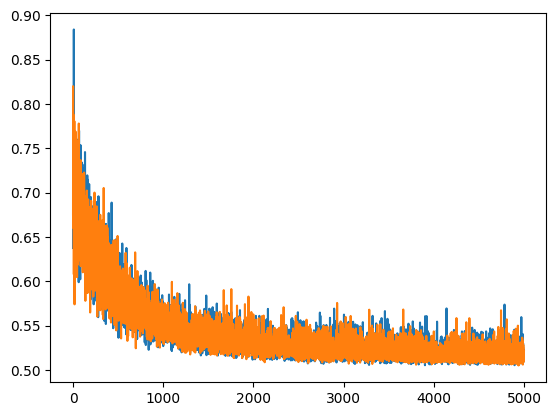

In [236]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

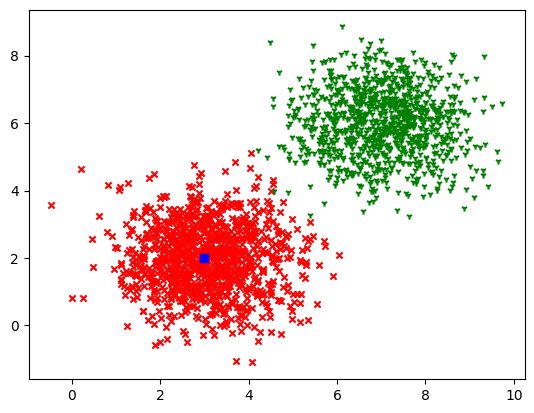

In [237]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

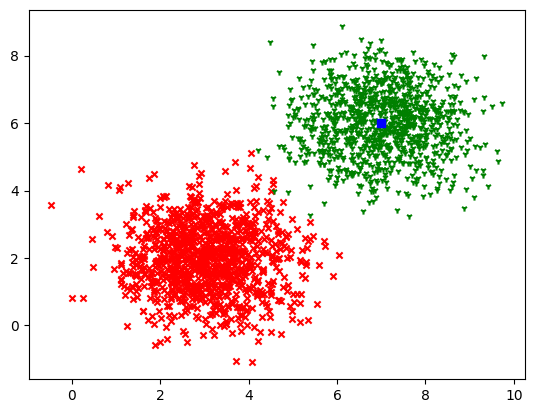

In [238]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

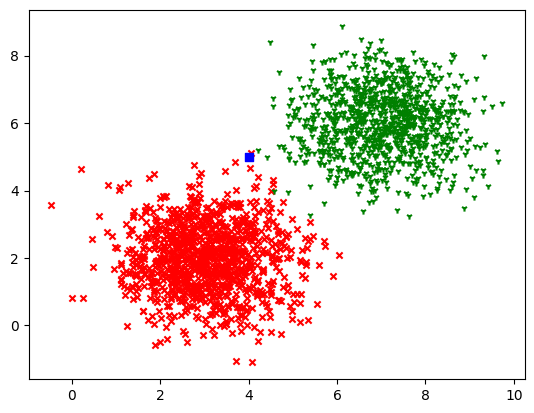

In [239]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Batch size - 100

In [240]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.1
batch_size = 100

w = tf.Variable(np.random.random((2, 2)))
b = tf.Variable(np.random.random((2)))
data = np.column_stack((xs,ys))
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)

    labels_batch_one_hot = tf.one_hot(labels_batch, depth=2)
    labels_val_batch_one_hot = tf.one_hot(labels_val_batch, depth=2)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch_one_hot, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch_one_hot, pred_l_val)
    Val_loss.append(val_loss.numpy())
    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])

  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.7951685311419974, shape=(), dtype=float64) val_loss tf.Tensor(0.7856418481247264, shape=(), dtype=float64)
loss tf.Tensor(0.7624749346829975, shape=(), dtype=float64) val_loss tf.Tensor(0.8183081053596879, shape=(), dtype=float64)
loss tf.Tensor(0.7908341023036155, shape=(), dtype=float64) val_loss tf.Tensor(0.7799176941958692, shape=(), dtype=float64)
loss tf.Tensor(0.7877083495986459, shape=(), dtype=float64) val_loss tf.Tensor(0.7673605268404264, shape=(), dtype=float64)
loss tf.Tensor(0.7883066311585654, shape=(), dtype=float64) val_loss tf.Tensor(0.8095038359451934, shape=(), dtype=float64)
loss tf.Tensor(0.8007723652234441, shape=(), dtype=float64) val_loss tf.Tensor(0.7986138960226427, shape=(), dtype=float64)
loss tf.Tensor(0.7708319496491831, shape=(), dtype=float64) val_loss tf.Tensor(0.7831473873532236, shape=(), dtype=float64)
loss tf.Tensor(0.7833367340881903, shape=(), dtype=float64) val_loss tf.Tensor(0.744516866424117, shape=(), dtype=float64)
loss tf.T

In [241]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

3200 1600 800 400


In [242]:
np.max(Loss),np.min(Loss)

(0.8007723652234441, 0.5113890253787418)

In [243]:
np.max(Val_loss),np.min(Val_loss)

(0.8183081053596879, 0.511993478640346)

In [244]:
print(w.numpy())
print(b.numpy())

[[ 0.35655663  1.24142172]
 [-0.00202623  1.30862547]]
[ 5.07338022 -4.22840152]


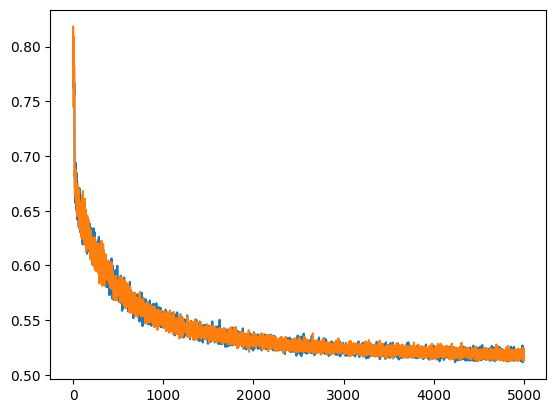

In [245]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

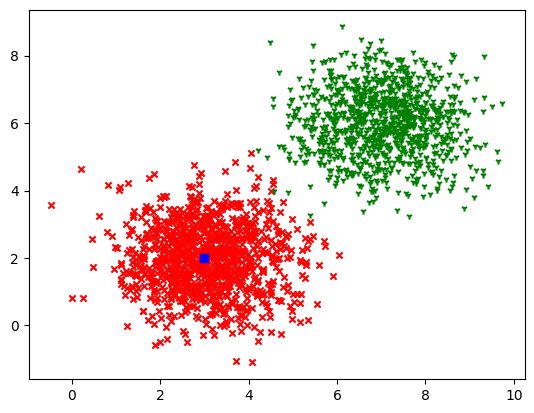

In [246]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

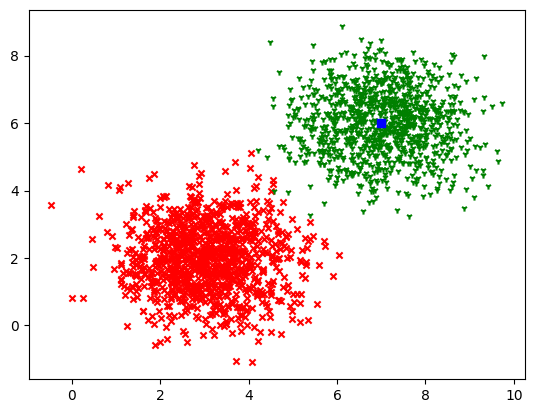

In [247]:
x=7.0
y=6.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

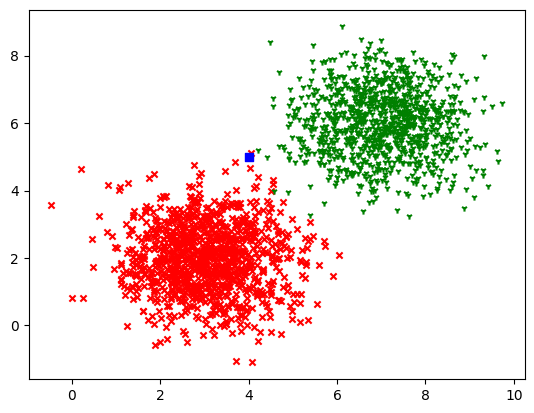

In [248]:
x=4.0
y=5.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

Najlepsze wyniki otrzymałem dla współczynnika uczenia 0.1, liczby epok 5000, batcha równego 20, najgorsze dla współczynnika uczenia 0.001, liczby epok 100, batcha równego 100.

I got the best results for a learning rate of 0.1, a number of epochs of 5000, a batch of 20, and the worst for a learning rate of 0.001, a number of epochs of 100, a batch of 100.